In [26]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-07 18:50:57,741: Credentials are already in use. The existing account in the session will be replaced.


In [27]:
import qiskit as qc
from qiskit.circuit.random import random_circuit

In [37]:
baseCircuit = qc.QuantumCircuit(2,2)
NumQubits = baseCircuit.num_qubits

In [38]:
baseCircuit.h(0)
baseCircuit.x(0)
baseCircuit.h(1)
baseCircuit.cx(0,1)
baseCircuit.barrier(0)

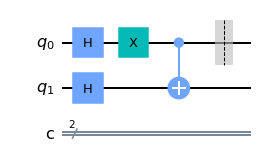

In [39]:
baseCircuit.draw()

In [40]:
strings = baseCircuit.qasm()

In [41]:
##gets the number of cycles applied to each gate
def getBarriers(strings):
    barriers = 0
    res = strings.split()
    for word in res:
        if word == "barrier":
            barriers += 1
    return barriers
NumCycles = getBarriers(strings) + 1
print(NumCycles)

2


In [42]:
## gets the list of gates & functions applied to each qubit
lis = []
line = ""
for s in strings:
    if s == ";":
        lis.append(line)
        line = ""
    elif s == "\n":
        pass
    else:
        line += s

In [52]:
## print the number of gates
lis 

['OPENQASM 2.0',
 'include "qelib1.inc"',
 'qreg q[2]',
 'creg c[2]',
 'h q[0]',
 'x q[0]',
 'h q[1]',
 'cx q[0],q[1]',
 'barrier q[0]']

In [53]:
##this will save the information for each circuit applied
class CircuitInfo:
    def __init__(circuit):
        circuit.NumQubits = 0
        circuit.NumCycles = 0
        circuit.Gates = []
    def getNumQubits(circuit):
        return circuit.NumQubits
    def getNumCycles(circuit):
        return circuit.NumCycles
    def setNumQubits(circuit, NumQubits):
        circuit.NumQubits = NumQubits
    def setNumCycles(circuit, NumCycles):
        circuit.NumCycles = NumCycles
    def getGates(circuit):
        return circuit.Gates
    def setGates(circuit, lis):
        circuit.Gates = lis

In [54]:
Alice = CircuitInfo()
Alice.setNumQubits(QuantumBits)
Alice.setNumCycles(NumCycles)
Alice.setGates(lis)
print(Alice.NumQubits, Alice.NumCycles)
print(Alice.Gates)

3 2
['OPENQASM 2.0', 'include "qelib1.inc"', 'qreg q[2]', 'creg c[2]', 'h q[0]', 'x q[0]', 'h q[1]', 'cx q[0],q[1]', 'barrier q[0]']


#1st function: take in the qc and return information, like, number of qubits, & number of cycles
#def parse(QuantumCircuit):